In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# Line Search Methods

To show the performance of line search methods we will test each of these over three different kinds of objective function:
- a convex *quadratic* function with not too much nicely conditioned, i.e., a bit elongated Hessian;
- the *Rosenbrock* function, a nonlinear function with one global minimum;
- the *Six-Hump Camel* function, a nonlinear function with six local minima, two of which are global.

In [2]:
import numpy as np

from optiml.opti import Quadratic

Q = [[5, -3], 
     [-3, 5]]
q = [10, 5]
quad = Quadratic(Q, q)

The optimal solution of the linear system:

$$ Qx = q $$

is:

$$ x^* = Q^{-1} q $$

In [3]:
np.linalg.inv(Q).dot(q)

array([4.0625, 3.4375])

In [4]:
from optiml.opti.unconstrained import Rosenbrock, SixHumpCamel

rosen = Rosenbrock()
shc = SixHumpCamel()

In [5]:
from optiml.opti.unconstrained.line_search import *
from optiml.opti.utils import plot_surface_trajectory_optimization

## 1st Order Methods

### Steepest Gradient Descent

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 3.0000e+00	 1.3153e+01	 1.1038e+00		
   5	    1	-2.8764e+01	 1.0521e+00	 4.9043e-03	 4.4432e-03
  10	    1	-2.8906e+01	 5.8441e-02	 2.1791e-05	 6.2988e-04
  15	    1	-2.8906e+01	 4.6747e-03	 9.6819e-08	 2.7987e-06
  20	    1	-2.8906e+01	 2.5966e-04	 4.3018e-10	 1.2435e-08
  25	    1	-2.8906e+01	 2.0770e-05	 1.9112e-12	 5.5245e-11
  30	    1	-2.8906e+01	 1.1537e-06	 8.6033e-15	 2.4869e-13

[-4.06249977 -3.43749989]


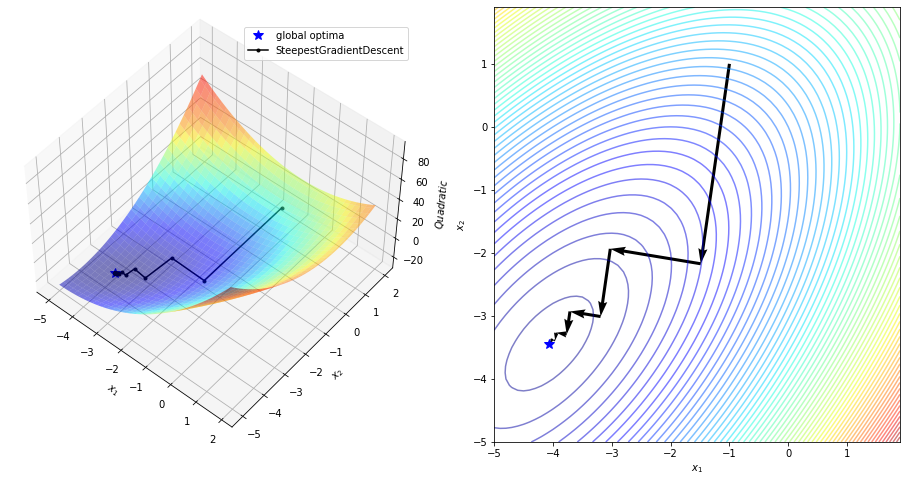

In [6]:
opt = SteepestGradientDescent(f=quad, x=[-1, 1], verbose=5).minimize()
print(opt.x)
plot_surface_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 4.0000e+00	 4.0000e+00	 4.0000e+00			ls:     1	it:     1	astar:  2.0000e-02
  10	   24	 1.4069e-01	 7.8869e-01	 1.4069e-01	 3.5172e-02	ls:     1	it:     1	astar:  1.3544e-01
  20	   43	 9.6148e-03	 3.6070e-01	 9.6148e-03	 9.6148e-03	ls:     1	it:     1	astar:  7.2205e-02
  30	   60	 1.9204e-04	 2.4352e-02	 1.9204e-04	 1.9204e-04	ls:     1	it:     1	astar:  6.1560e-02
  40	   80	 8.0739e-05	 1.3164e-02	 8.0739e-05	 8.0739e-05	ls:     1	it:     1	astar:  7.0312e-02
  50	  100	 3.8126e-05	 8.2978e-03	 3.8126e-05	 3.8126e-05	ls:     1	it:     1	astar:  7.7335e-02
  60	  120	 1.8733e-05	 5.5144e-03	 1.8733e-05	 1.8733e-05	ls:     1	it:     1	astar:  8.3326e-02
  70	  140	 9.3507e-06	 3.7591e-03	 9.3507e-06	 9.3507e-06	ls:     1	it:     1	astar:  8.8386e-02
  80	  160	 4.6935e-06	 2.5980e-03	 4.6935e-06	 4.6935e-06	ls:     1	it:     1	astar:  9.2548e-02
  90	  180	 2.3582e-06	 1.8097e-03	 2.3582e-06	 2.3582e-06	ls:     1	it:     1	astar:  9.5

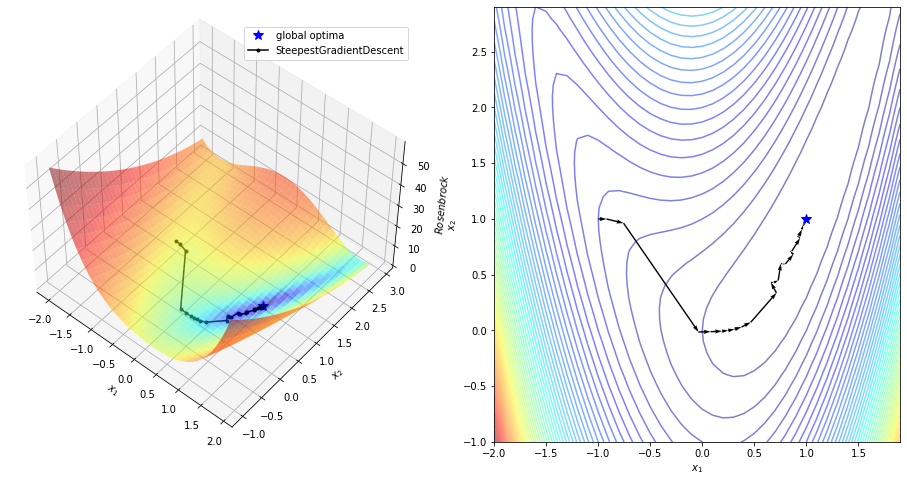

In [7]:
opt = SteepestGradientDescent(f=rosen, x=[-1, 1], verbose=10).minimize()
print(opt.x)
plot_surface_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 2.2333e+00	 1.8868e+00	 3.1649e+00			ls:     1	it:     3	astar:  5.8150e-01
   1	    5	-9.1635e-01	 1.5758e+00	 1.1175e-01	 3.5309e-02	ls:     1	it:     2	astar:  2.0777e-02
   2	    8	-9.6321e-01	 1.2775e+00	 6.6316e-02	 6.8413e-02	ls:     1	it:     1	astar:  1.3590e-02
   3	   10	-9.8383e-01	 1.0948e+00	 4.6332e-02	 4.7798e-02	ls:     1	it:     1	astar:  1.5862e-02
   4	   12	-1.0011e+00	 8.9463e-01	 2.9565e-02	 3.0501e-02	ls:     1	it:     1	astar:  1.9159e-02
   5	   14	-1.0146e+00	 6.8005e-01	 1.6462e-02	 1.6983e-02	ls:     1	it:     1	astar:  2.4138e-02
   6	   16	-1.0240e+00	 4.5943e-01	 7.3807e-03	 7.6141e-03	ls:     1	it:     1	astar:  3.1986e-02
   7	   18	-1.0292e+00	 2.5213e-01	 2.3108e-03	 2.3839e-03	ls:     1	it:     1	astar:  4.5108e-02
   8	   20	-1.0312e+00	 9.5287e-02	 4.2538e-04	 4.3884e-04	ls:     1	it:     1	astar:  7.5212e-02
   9	   22	-1.0316e+00	 3.2496e-02	 5.8788e-05	 6.0648e-05	ls:     1	it:     1	astar:  1.0

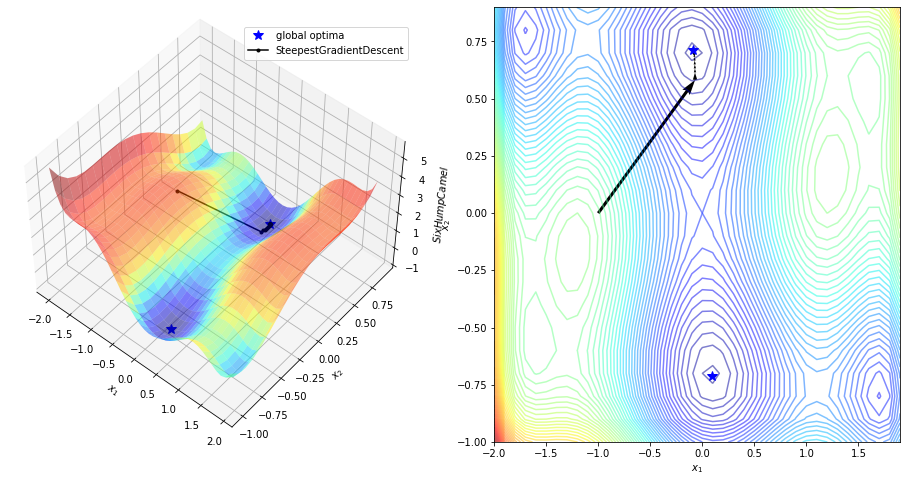

In [8]:
opt = SteepestGradientDescent(f=shc, x=[-1, 0], verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(shc, opt, x_min=-2, x_max=2, y_min=-1, y_max=1)

### Conjugate Gradient

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 3.0000e+00	 1.3153e+01	 1.1038e+00					
   1	    1	-1.8106e+01	 9.1829e+00	 3.7361e-01	 3.3848e-01
   2	    1	-2.8906e+01	 1.7764e-15	-3.6871e-16	-9.8689e-16

[-4.0625 -3.4375]


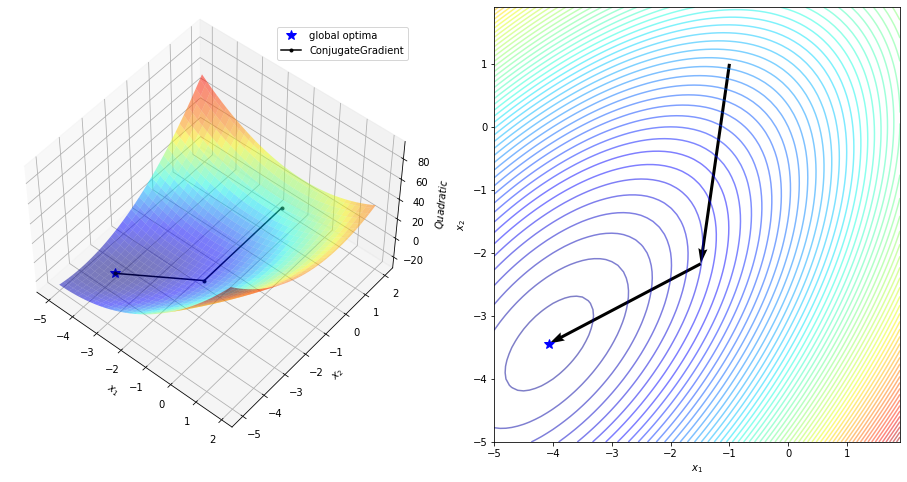

In [9]:
opt = ConjugateGradient(f=quad, x=[-1, 1], verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

#### Fletcher-Reeves formula

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 4.0000e+00	 4.0000e+00	 4.0000e+00						ls:     1	it:     1	astar:  2.0000e-02
   5	   31	 2.8968e-01	 1.3019e+00	 2.8968e-01	 7.2419e-02	beta:  4.4868e-01	ls:     1	it:     1	astar:  1.0000e-02
  10	   41	 1.8175e-01	 5.2523e-01	 1.8175e-01	 1.8175e-01	beta:  9.8681e-01	ls:     1	it:     1	astar:  1.0000e-02
  15	   51	 1.2203e-01	 1.1813e+00	 1.2203e-01	 1.2203e-01	beta:  1.5196e+00	ls:     1	it:     1	astar:  1.0000e-02
  20	   64	 7.5572e-02	 1.9254e+00	 7.5572e-02	 7.5572e-02	beta:  9.2945e-01	ls:     1	it:     2	astar:  4.3459e-03
  25	   79	 5.9316e-02	 4.2915e-01	 5.9316e-02	 5.9316e-02	beta:  4.6664e-01	ls:     1	it:     2	astar:  3.9875e-03
  30	   94	 5.8465e-02	 1.9939e-01	 5.8465e-02	 5.8465e-02	beta:  1.2659e+00	ls:     1	it:     2	astar:  7.2812e-03
  35	  107	 5.3899e-02	 1.0796e+00	 5.3899e-02	 5.3899e-02	beta:  1.9714e+00	ls:     1	it:     1	astar:  1.0000e-02
  40	  118	 2.1515e-02	 2.9726e-01	 2.1515e-02	 2.1515e-02	

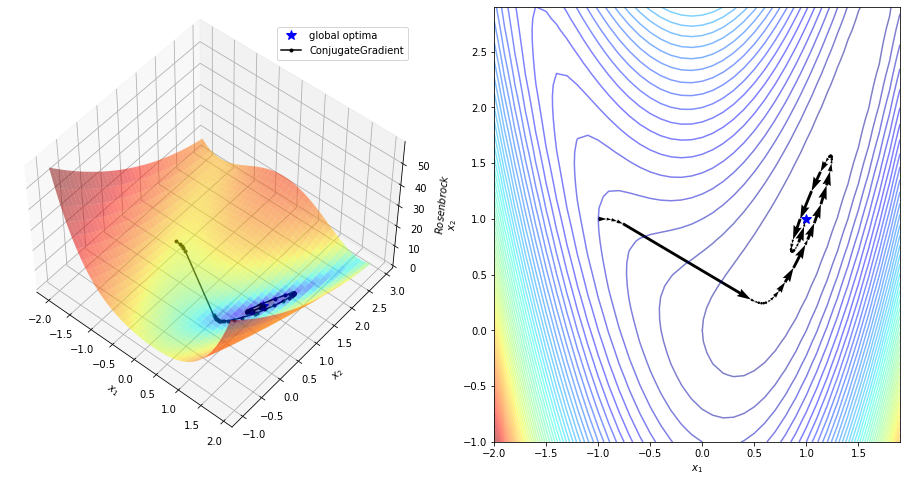

In [10]:
opt = ConjugateGradient(f=rosen, x=[-1, 1], wf='fr', verbose=5).minimize()
print(opt.x)
plot_surface_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 2.2333e+00	 1.8868e+00	 3.1649e+00						ls:     1	it:     3	astar:  5.8150e-01
  10	   23	-1.0308e+00	 1.6985e-01	 8.2963e-04	 2.6214e-04	beta:  9.9600e-01	ls:     1	it:     1	astar:  1.0000e-02
  20	   43	-1.0314e+00	 7.5113e-02	 2.6398e-04	 2.7233e-04	beta:  6.4080e-01	ls:     1	it:     1	astar:  1.0721e-02
  30	   63	-1.0316e+00	 2.8424e-02	 4.8725e-05	 5.0266e-05	beta:  9.4908e-01	ls:     1	it:     1	astar:  1.4613e-02
  40	   83	-1.0316e+00	 1.6213e-02	 9.3840e-06	 9.6808e-06	beta:  1.1289e+00	ls:     1	it:     1	astar:  1.4498e-02
  50	  103	-1.0316e+00	 7.3071e-03	 1.6484e-06	 1.7005e-06	beta:  7.4619e-01	ls:     1	it:     1	astar:  1.1546e-02
  60	  123	-1.0316e+00	 2.3942e-03	 2.8430e-07	 2.9329e-07	beta:  6.5313e-01	ls:     1	it:     1	astar:  1.2135e-02
  70	  143	-1.0316e+00	 1.0901e-03	 3.7954e-08	 3.9155e-08	beta:  9.9148e-01	ls:     1	it:     1	astar:  1.4967e-02
  80	  163	-1.0316e+00	 6.3567e-04	-1.6523e-08	-1.7045e-08	

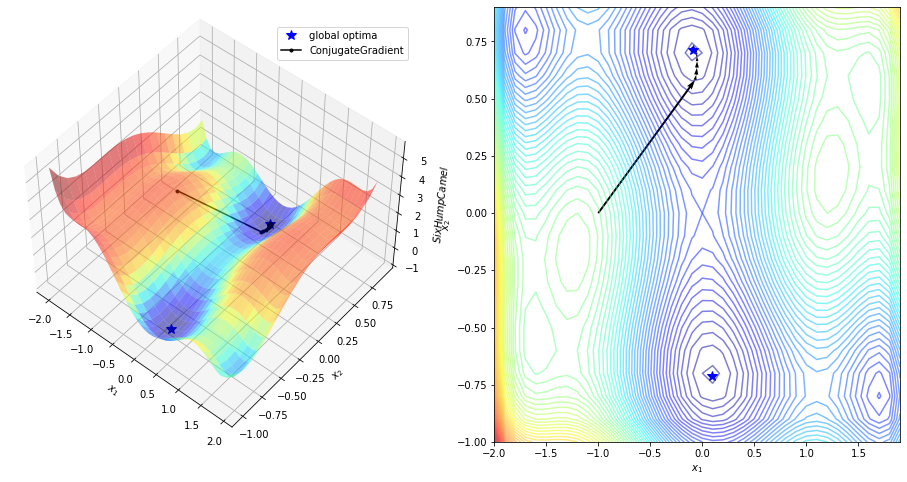

In [11]:
opt = ConjugateGradient(f=shc, x=[-1, 0], wf='fr', verbose=10).minimize()
print(opt.x)
plot_surface_trajectory_optimization(shc, opt, x_min=-2, x_max=2, y_min=-1, y_max=1)

#### Polak-Ribière formula

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 4.0000e+00	 4.0000e+00	 4.0000e+00						ls:     1	it:     1	astar:  2.0000e-02
   5	   15	 7.0010e-01	 1.6060e+00	 7.0010e-01	 1.7503e-01	beta:  0.0000e+00	ls:     1	it:     1	astar:  3.8536e-02
  10	   25	 1.4829e-01	 7.7794e-01	 1.4829e-01	 1.4829e-01	beta:  6.2352e-01	ls:     1	it:     1	astar:  1.5693e-01
  15	   34	 1.3598e-03	 9.1988e-02	 1.3598e-03	 1.3598e-03	beta:  1.5234e+00	ls:     1	it:     1	astar:  6.7634e-02
  20	   42	 3.0511e-06	 3.0443e-03	 3.0511e-06	 3.0511e-06	beta:  2.8986e+00	ls:     1	it:     0	astar:  1.0000e+00

[0.99909483 0.99815437]


/home/donato/Insync/donato.meoli.95@gmail.com/Google Drive/MachineLearning&ComputationalMathematics/optiml/optiml/opti/unconstrained/line_search/line_search.py:222: RuntimeWarning: divide by zero encountered in double_scalars
  a = (am * phi_ps - _as * phi_pm) / (phi_ps - phi_pm)


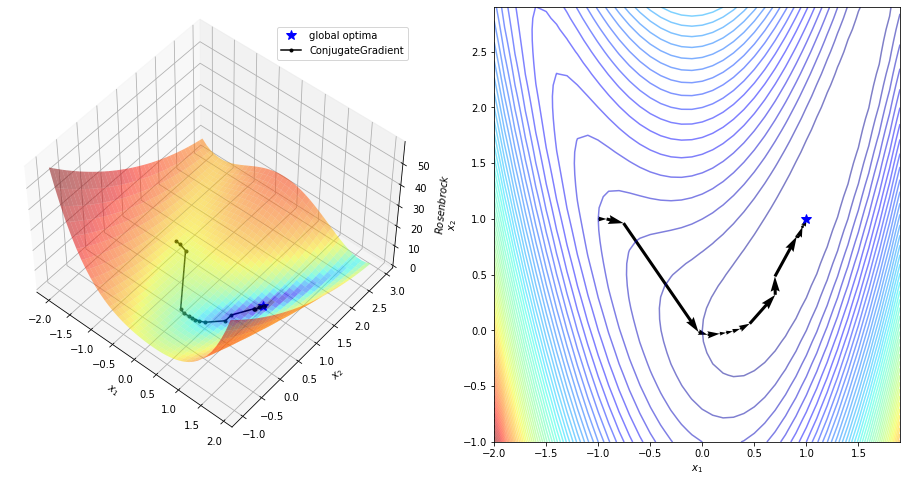

In [12]:
opt = ConjugateGradient(f=rosen, x=[-1, 1], wf='pr', verbose=5).minimize()
print(opt.x)
plot_surface_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 2.2333e+00	 1.8868e+00	 3.1649e+00						ls:     1	it:     3	astar:  5.8150e-01
   1	    5	-9.1635e-01	 1.5758e+00	 1.1175e-01	 3.5309e-02	beta:  2.6729e-01	ls:     1	it:     1	astar:  1.0000e-02
   2	    7	-9.4368e-01	 1.4124e+00	 8.5253e-02	 8.7949e-02	beta:  0.0000e+00	ls:     1	it:     1	astar:  1.2288e-02
   3	    9	-9.6676e-01	 1.2448e+00	 6.2876e-02	 6.4865e-02	beta:  0.0000e+00	ls:     1	it:     1	astar:  1.4026e-02
   4	   11	-9.8690e-01	 1.0590e+00	 4.3357e-02	 4.4728e-02	beta:  0.0000e+00	ls:     1	it:     1	astar:  1.6486e-02
   5	   13	-1.0036e+00	 8.5579e-01	 2.7130e-02	 2.7988e-02	beta:  0.0000e+00	ls:     1	it:     1	astar:  2.0101e-02
   6	   15	-1.0165e+00	 6.3880e-01	 1.4648e-02	 1.5111e-02	beta:  0.0000e+00	ls:     1	it:     1	astar:  2.5652e-02
   7	   17	-1.0252e+00	 4.1798e-01	 6.2423e-03	 6.4397e-03	beta:  0.0000e+00	ls:     1	it:     1	astar:  3.4634e-02
   8	   19	-1.0298e+00	 2.1588e-01	 1.8016e-03	 1.8586e-03	

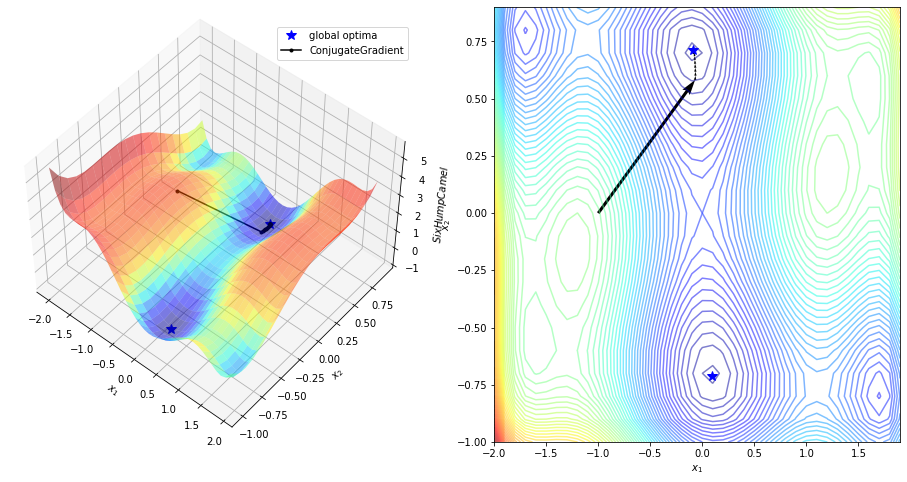

In [13]:
opt = ConjugateGradient(f=shc, x=[-1, 0], wf='pr', verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(shc, opt, x_min=-2, x_max=2, y_min=-1, y_max=1)

#### Hestenes-Stiefel formula

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 4.0000e+00	 4.0000e+00	 4.0000e+00						ls:     1	it:     1	astar:  2.0000e-02
   5	   10	 1.4668e+00	 2.3990e+00	 1.4668e+00	 3.6669e-01	beta: -7.7885e-01	ls:     1	it:     0	astar:  1.0000e+00
  10	   17	 7.7104e-01	 1.6627e+00	 7.7104e-01	 5.2568e-01	(res)			ls:     1	it:     1	astar:  4.7428e-02
  15	   25	 3.8825e-01	 1.2009e+00	 3.8825e-01	 3.8825e-01	beta: -8.0205e-01	ls:     1	it:     0	astar:  1.0000e+00
  20	   32	 8.3886e-02	 5.8252e-01	 8.3886e-02	 8.3886e-02	(res)			ls:     1	it:     1	astar:  4.3884e-02
  25	   39	 2.3670e-03	 4.7555e-02	 2.3670e-03	 2.3670e-03	beta: -4.0532e-01	ls:     1	it:     1	astar:  1.1195e-01
  30	   47	 9.9184e-05	 1.0755e-02	 9.9184e-05	 9.9184e-05	(res)			ls:     1	it:     1	astar:  1.1645e-01
  35	   55	 1.0606e-07	 7.0524e-04	 1.0606e-07	 1.0606e-07	beta:  4.7640e+00	ls:     1	it:     1	astar:  4.2650e-01

[0.99999998 0.99999985]


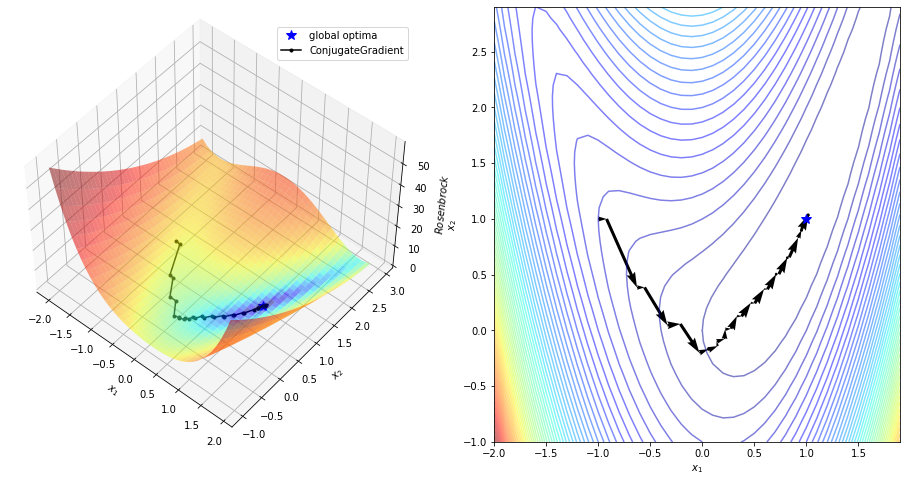

In [14]:
opt = ConjugateGradient(f=rosen, x=[-1, 1], wf='hs', r_start=1, verbose=5).minimize()
print(opt.x)
plot_surface_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 2.2333e+00	 1.8868e+00	 3.1649e+00						ls:     1	it:     3	astar:  5.8150e-01
   1	    5	-9.1635e-01	 1.5758e+00	 1.1175e-01	 3.5309e-02	beta:  4.6912e-01	ls:     1	it:     1	astar:  1.0000e-02
   2	    7	-9.4621e-01	 1.3922e+00	 8.2801e-02	 8.5420e-02	beta: -5.7376e-01	ls:     1	it:     1	astar:  1.8555e-01
   3	    9	-9.7137e-01	 1.2182e+00	 5.8411e-02	 6.0258e-02	beta:  1.6384e-01	ls:     1	it:     1	astar:  1.8101e-02
   4	   11	-9.9509e-01	 9.5333e-01	 3.5420e-02	 3.6541e-02	beta: -7.7095e-01	ls:     1	it:     1	astar:  2.3680e-01
   5	   13	-9.9821e-01	 9.5181e-01	 3.2394e-02	 3.3419e-02	beta:  8.3853e-01	ls:     1	it:     1	astar:  2.2326e-02
   6	   15	-1.0155e+00	 6.7579e-01	 1.5586e-02	 1.6079e-02	beta: -7.1026e-01	ls:     1	it:     9	astar:  1.0000e-18

[-0.1135345  0.6717522]


/home/donato/Insync/donato.meoli.95@gmail.com/Google Drive/MachineLearning&ComputationalMathematics/optiml/optiml/opti/unconstrained/line_search/line_search.py:222: RuntimeWarning: divide by zero encountered in double_scalars
  a = (am * phi_ps - _as * phi_pm) / (phi_ps - phi_pm)


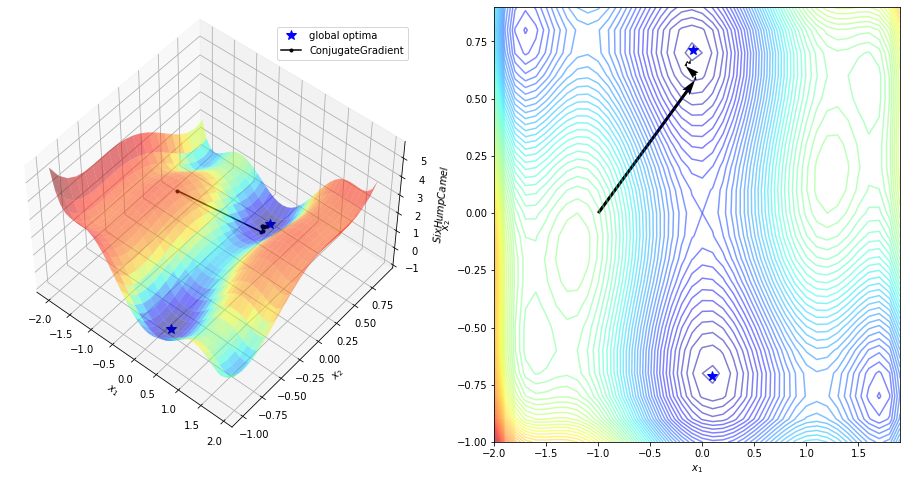

In [15]:
opt = ConjugateGradient(f=shc, x=[-1, 0], wf='hs', verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(shc, opt, x_min=-2, x_max=2, y_min=-1, y_max=1)

#### Dai-Yuan formula

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 4.0000e+00	 4.0000e+00	 4.0000e+00						ls:     1	it:     1	astar:  2.0000e-02
   5	   19	 2.3544e-01	 1.2992e+00	 2.3544e-01	 5.8860e-02	beta:  4.8081e-01	ls:     1	it:     1	astar:  1.0000e-02
  10	   29	 1.3264e-01	 4.9573e-01	 1.3264e-01	 1.3264e-01	beta:  1.2434e+00	ls:     1	it:     1	astar:  1.0000e-02
  15	   39	 6.0939e-02	 9.7472e-01	 6.0939e-02	 6.0939e-02	beta:  1.0711e+00	ls:     1	it:     1	astar:  1.0000e-02
  20	   50	 2.1500e-04	 1.7105e-02	 2.1500e-04	 2.1500e-04	beta:  7.6030e-01	ls:     1	it:     0	astar:  1.0000e+00
  25	   59	 1.3251e-06	 4.6609e-03	 1.3251e-06	 1.3251e-06	beta:  7.4769e-01	ls:     1	it:     1	astar:  8.6341e-02
  30	   69	 1.7606e-08	 3.5980e-04	 1.7606e-08	 1.7606e-08	beta:  1.1168e-01	ls:     1	it:     1	astar:  8.1782e-02
  35	   79	 5.3574e-10	 3.4359e-05	 5.3574e-10	 5.3574e-10	beta:  1.5272e-01	ls:     1	it:     1	astar:  1.5571e-01
  40	   89	 1.9545e-11	 7.1718e-06	 1.9545e-11	 1.9545e-11	

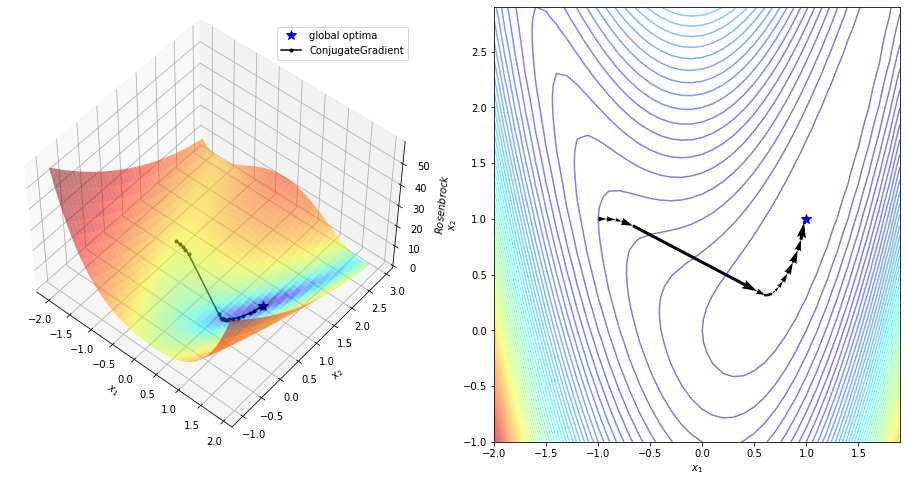

In [16]:
opt = ConjugateGradient(f=rosen, x=[-1, 1], wf='dy', verbose=5).minimize()
print(opt.x)
plot_surface_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 2.2333e+00	 1.8868e+00	 3.1649e+00						ls:     1	it:     3	astar:  5.8150e-01
  10	   23	-1.0298e+00	 2.3802e-01	 1.7349e-03	 5.4818e-04	beta:  9.5752e-01	ls:     1	it:     1	astar:  2.9100e-02
  20	   43	-1.0316e+00	 1.8857e-02	 1.0458e-05	 1.0789e-05	beta:  6.8356e-01	ls:     1	it:     1	astar:  2.9118e-02
  30	   63	-1.0316e+00	 1.1734e-03	 2.0151e-08	 2.0789e-08	beta:  4.0455e-01	ls:     1	it:     1	astar:  2.7777e-02
  40	   83	-1.0316e+00	 7.1755e-05	-2.9347e-08	-3.0275e-08	beta:  3.6786e-01	ls:     1	it:     1	astar:  3.2336e-02
  50	  103	-1.0316e+00	 5.2708e-06	-2.9623e-08	-3.0560e-08	beta:  5.5196e-01	ls:     1	it:     1	astar:  4.1853e-02

[-0.08984195  0.71265636]


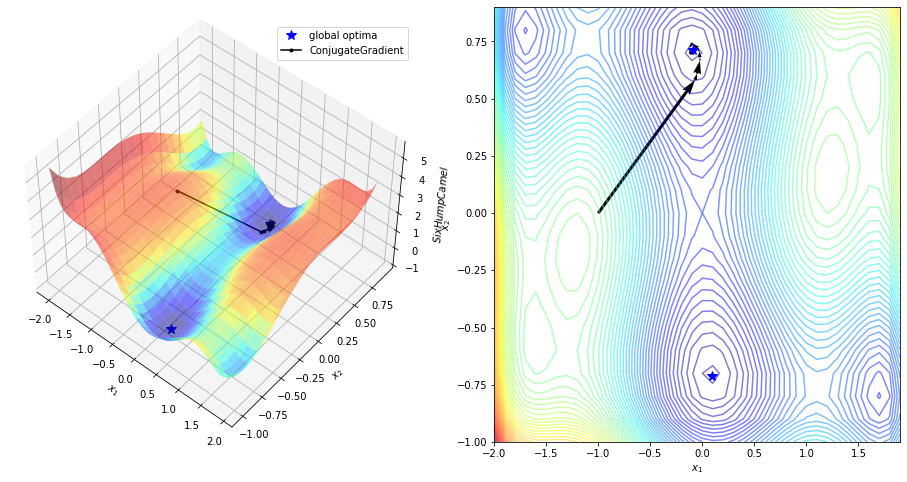

In [17]:
opt = ConjugateGradient(f=shc, x=[-1, 0], wf='dy', verbose=10).minimize()
print(opt.x)
plot_surface_trajectory_optimization(shc, opt, x_min=-2, x_max=2, y_min=-1, y_max=1)

## 2nd Order Methods

### Newton

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 3.0000e+00	 1.3153e+01	 1.1038e+00			delta:  1.0000e-06	ls:     1	it:     0	astar:  1.0000e+00
   1	    2	-2.8906e+01	 0.0000e+00	-1.2290e-16	-1.1135e-16

[-4.0625 -3.4375]


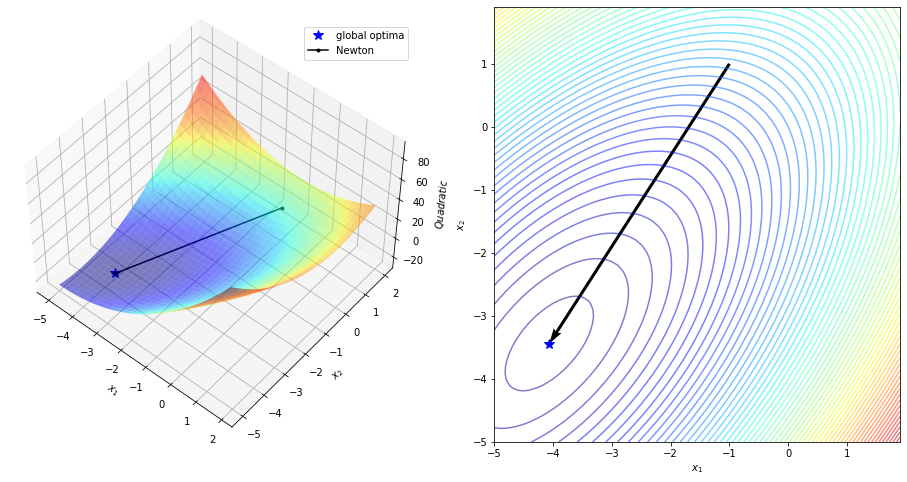

In [21]:
opt = Newton(f=quad, x=[-1, 1], verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 4.0000e+00	 4.0000e+00	 4.0000e+00			delta:  1.0000e-06	ls:     1	it:     2	astar:  1.1094e-01
   1	    4	 3.1666e+00	 3.8677e+00	 3.1666e+00	 7.9164e-01	delta:  1.0000e-06	ls:     1	it:     1	astar:  1.2322e-01
   2	    6	 2.5560e+00	 3.5683e+00	 2.5560e+00	 8.0718e-01	delta:  1.0000e-06	ls:     1	it:     1	astar:  1.9290e-01
   3	    8	 1.8760e+00	 3.0925e+00	 1.8760e+00	 7.3397e-01	delta:  1.0000e-06	ls:     1	it:     1	astar:  3.5560e-01
   4	   10	 1.1297e+00	 2.2308e+00	 1.1297e+00	 6.0215e-01	delta:  1.0000e-06	ls:     1	it:     0	astar:  1.0000e+00
   5	   11	 4.3941e-01	 1.5815e+00	 4.3941e-01	 3.8897e-01	delta:  1.0000e-06	ls:     1	it:     0	astar:  1.0000e+00
   6	   12	 6.7464e-02	 3.4182e-01	 6.7464e-02	 6.7464e-02	delta:  1.0000e-06	ls:     1	it:     0	astar:  1.0000e+00
   7	   13	 6.0875e-03	 3.9380e-01	 6.0875e-03	 6.0875e-03	delta:  1.0000e-06	ls:     1	it:     0	astar:  1.0000e+00
   8	   14	 2.6022e-05	 5.7622e-03	 

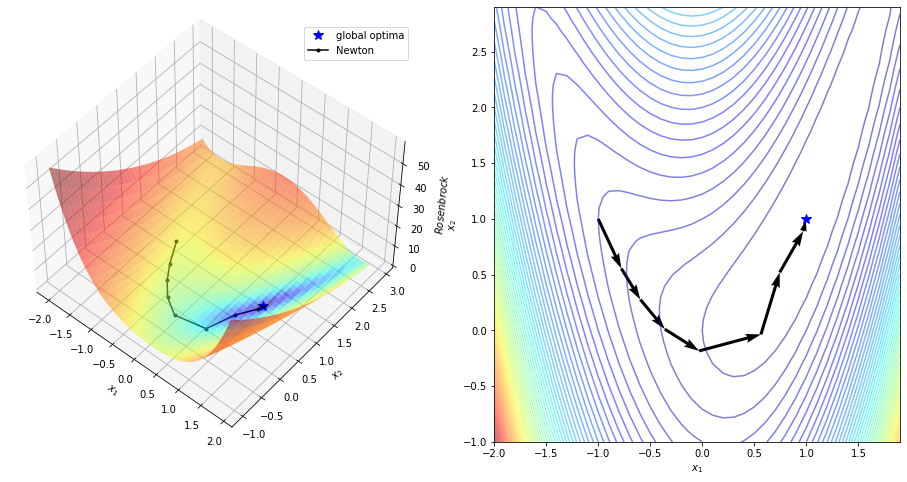

In [22]:
opt = Newton(f=rosen, x=[-1, 1], verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 2.2333e+00	 1.8868e+00	 3.1649e+00			delta:  8.6770e+00	ls:     1	it:    19	astar:  1.4192e-05
   1	   21	 1.9447e-01	 4.4419e+00	 1.1885e+00	 3.7553e-01	delta:  1.0000e-06	ls:     1	it:     0	astar:  1.0000e+00
   2	   22	-1.1927e-01	 2.3722e+00	 8.8438e-01	 7.4411e-01	delta:  1.0228e+00	ls:     1	it:     5	astar:  2.3876e-07
   3	   28	-1.0306e+00	 1.8655e-01	 9.9353e-04	 1.0250e-03	delta:  1.0000e-06	ls:     1	it:     0	astar:  1.0000e+00
   4	   29	-1.0316e+00	 4.0490e-03	 4.5900e-07	 4.7352e-07	delta:  1.0000e-06	ls:     1	it:     0	astar:  1.0000e+00
   5	   30	-1.0316e+00	 2.1198e-06	-2.9625e-08	-3.0562e-08	delta:  1.0000e-06	ls:     1	it:     0	astar:  1.0000e+00
   6	   31	-1.0316e+00	 5.8266e-13	-2.9625e-08	-3.0562e-08

[ 0.08984201 -0.7126564 ]


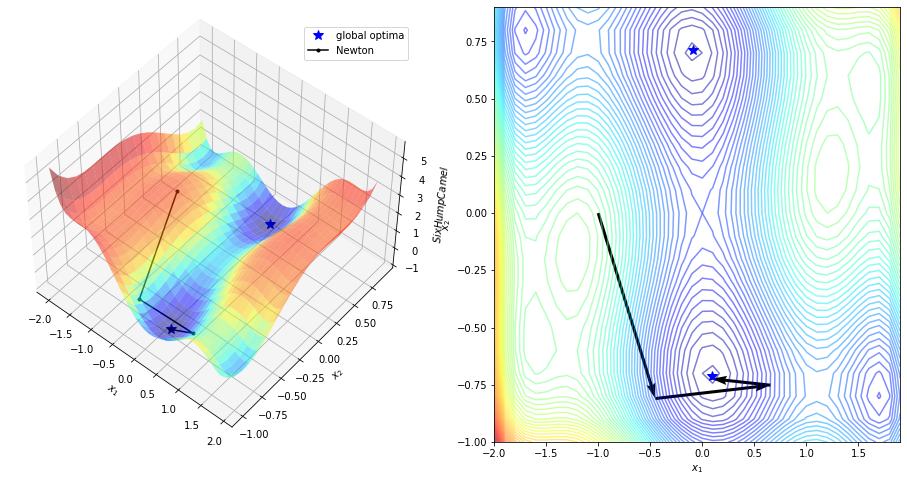

In [23]:
opt = Newton(f=shc, x=[-1, 0], verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(shc, opt, x_min=-2, x_max=2, y_min=-1, y_max=1)

### BFGS

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 1.7000e+01	 1.3892e+01	 1.5881e+00			ls:     1	it:     1	astar:  4.1866e-01	rho:  1.2376e-02
   1	    3	-2.3400e+01	 8.5886e+00	 1.9048e-01	 1.1994e-01	ls:     1	it:     1	astar:  1.4929e-01	rho:  9.0809e-02
   2	    5	-2.8906e+01	 0.0000e+00	-1.2290e-16	-6.4524e-16

[-4.0625 -3.4375]


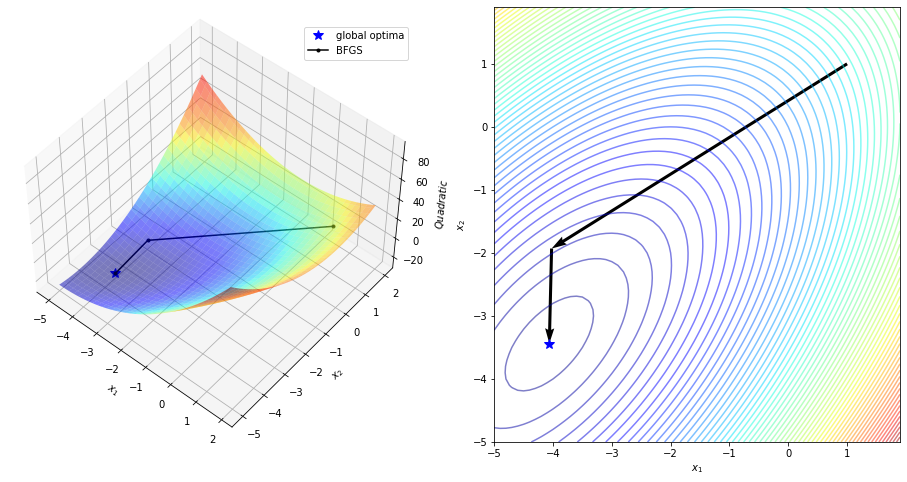

In [24]:
opt = BFGS(f=quad, x=[1, 1], verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 4.0000e+00	 4.0000e+00	 4.0000e+00			ls:     1	it:     1	astar:  2.0000e-02	rho:  9.6862e+00
   1	    3	 3.7336e+00	 2.7783e+00	 3.7336e+00	 9.3340e-01	ls:     1	it:     1	astar:  3.8616e-01	rho:  3.1745e+00
   2	    5	 2.2653e+00	 2.9717e+00	 2.2653e+00	 6.0673e-01	ls:     1	it:     2	astar:  5.7832e-02	rho:  1.8723e+01
   3	    8	 1.9327e+00	 2.9884e+00	 1.9327e+00	 8.5317e-01	ls:     1	it:     1	astar:  2.1912e-01	rho:  6.0276e+00
   4	   10	 1.4771e+00	 2.7396e+00	 1.4771e+00	 7.6429e-01	ls:     1	it:     1	astar:  4.4112e-01	rho:  3.0697e+00
   5	   12	 1.0980e+00	 2.1668e+00	 1.0980e+00	 7.4335e-01	ls:     1	it:     0	astar:  1.0000e+00	rho:  3.4975e+00
   6	   13	 7.7830e-01	 1.5901e+00	 7.7830e-01	 7.0883e-01	ls:     1	it:     0	astar:  1.0000e+00	rho:  3.5447e+00
   7	   14	 3.4279e-01	 8.4908e-01	 3.4279e-01	 3.4279e-01	ls:     1	it:     0	astar:  1.0000e+00	rho:  5.2482e+00
   8	   15	 1.0901e-01	 3.7674e-01	 1.0901e-01	 1.09

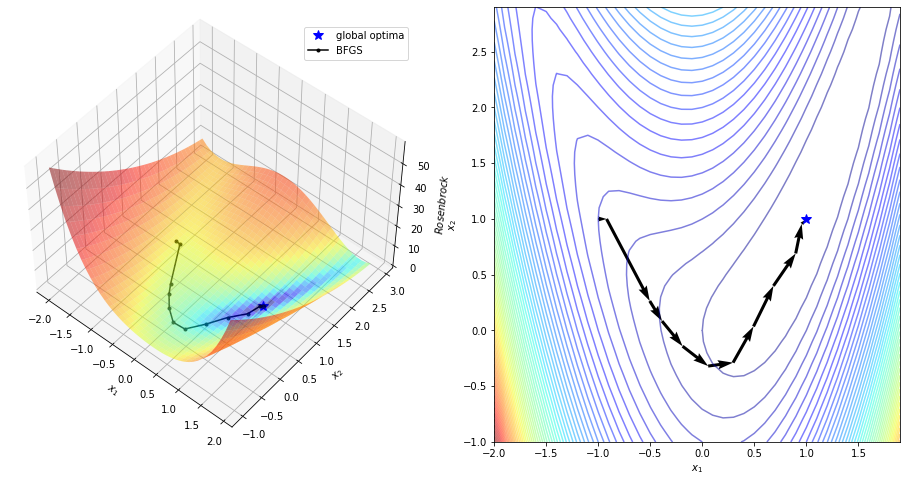

In [25]:
opt = BFGS(f=rosen, x=[-1, 1], verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

iter	feval	 cost		 gnorm		 gap		 rate
   0	    1	 2.2333e+00	 1.8868e+00	 3.1649e+00			ls:     1	it:     3	astar:  5.8150e-01	rho:  8.4782e-01
   1	    5	-9.1635e-01	 1.5758e+00	 1.1175e-01	 3.5309e-02	ls:     1	it:     1	astar:  1.0000e-02	rho:  5.0300e+01
   2	    7	-9.6964e-01	 1.1991e+00	 6.0088e-02	 6.1988e-02	ls:     1	it:     1	astar:  3.5046e-01	rho:  1.3565e+01
   3	    9	-1.0252e+00	 4.3057e-01	 6.2048e-03	 6.4011e-03	ls:     1	it:     0	astar:  1.0000e+00	rho:  3.5279e+01
   4	   10	-1.0301e+00	 2.1808e-01	 1.5147e-03	 1.5626e-03	ls:     1	it:     0	astar:  1.0000e+00	rho:  2.9616e+02
   5	   11	-1.0316e+00	 9.1501e-03	 2.4346e-06	 2.5116e-06	ls:     1	it:     0	astar:  1.0000e+00	rho:  1.9512e+05
   6	   12	-1.0316e+00	 3.3762e-04	-2.2465e-08	-2.3176e-08	ls:     1	it:     0	astar:  1.0000e+00	rho:  5.3915e+07
   7	   13	-1.0316e+00	 4.0834e-05	-2.9520e-08	-3.0453e-08	ls:     1	it:     0	astar:  1.0000e+00	rho:  4.6156e+09
   8	   14	-1.0316e+00	 1.1996e-08	-2.9625e-08	-3.05

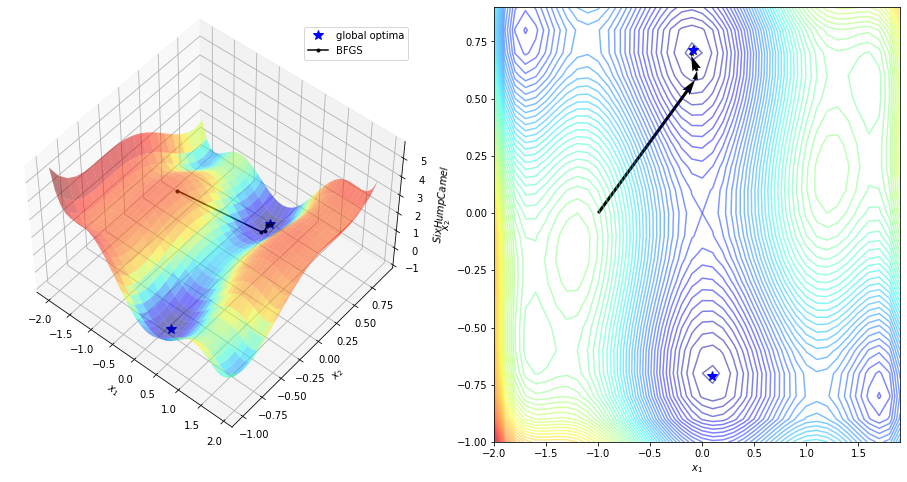

In [26]:
opt = BFGS(f=shc, x=[-1, 0], verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(shc, opt, x_min=-2, x_max=2, y_min=-1, y_max=1)